# Lecture 19

Mora randomness. Mean and standard deviation. Simulations that use randomness.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# numpy array with uniform random numbers
np.random.uniform(low=0, high=1, size=9)

array([ 0.06338181,  0.02569077,  0.46695246,  0.51746962,  0.41736873,
        0.76491016,  0.34586409,  0.79547829,  0.27020484])

In [3]:
# numpy array with Gaussian (normal) random numbers
np.random.normal(loc=0.0, scale=1.0, size=9)

array([ 1.51366209, -1.13783313,  0.187717  ,  0.11261519,  0.02076459,
       -1.54907158, -0.70236171,  0.68117334,  0.43831202])

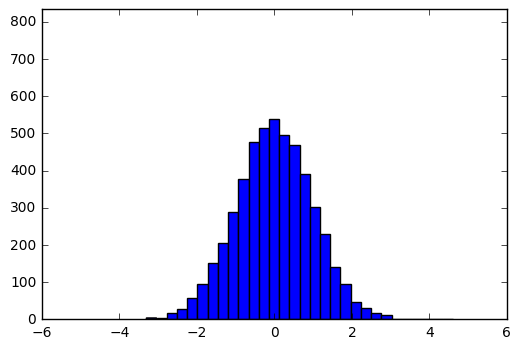

In [4]:
N = 5000
mu = 0.0
sigma = 1.0  # highers standard dev
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, N/6])
_,_,_ = plt.hist(X, 30)

## Choice: chooses a random element of a list

In [5]:
import random
words = ["love", "hate", "tender", "care", "deep"]
random.choice(words)

'hate'

In [6]:
# random poem:
poem = []
poem.extend([random.choice(words) for _ in range(3)])
poem.append("\n")
poem.extend([random.choice(words) for _ in range(3)])
poem.append("\n")
poem.extend([random.choice(words) for _ in range(4)])
poem.append("\n")
poem.extend([random.choice(words) for _ in range(3)])
print(" ".join(poem))

love care tender 
 tender hate care 
 hate love care hate 
 love care care


# Mean and Standard Deviation of a Data-set

Say I am given a numpy array X full of numbers (e.g. grades).


In [7]:
X = np.array([67, 62, 78, 67, 64, 52, 50, 80, 50, 94, 77, 62, 78, 67, 44, 52, 70, 80, 50, 94, 100, 61, 59, 56, 30, 91, 60, 54, 34, 98])

In [8]:
print("shape:", X.shape)
# grade range:
min(X), max(X)

shape: (30,)


(30, 100)

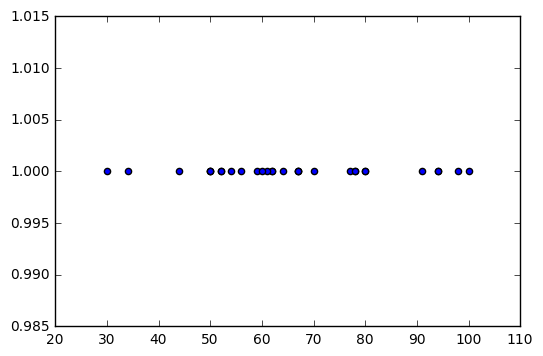

In [9]:
plt.scatter(X, np.zeros(30)+1)

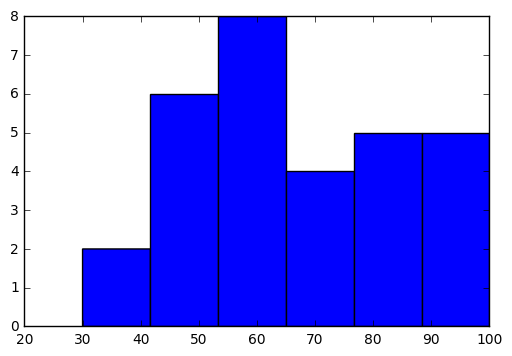

In [10]:
_, _, _ = plt.hist(X,6)

**Question: ** If we knew that these numbers came from a normal distribution $N(\mu, \sigma)$, what is the most likely normal distribution that this data would have come from?


**Answer: ** It's the normal distribution $N(\mu, \sigma)$ where $\mu$ is the mean of the data, and $\sigma$ is the standard deviation of the data. Mean is the average of the data, standard deviation is the square root of the average of the square of the distance to the mean of the data... better to write down the formula:

$$\mu = \frac{1}{N}\sum_{i=1}^N x_i$$

$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2}$$

In python, we can use `np.mean` and `np.std` to compute these.

In [11]:
mu, sigma = np.mean(X), np.std(X)
print("mean: ", mu)
print("standard deviation: ", sigma)

mean:  66.0333333333
standard deviation:  17.8390644996


Recall that the Gaussian distribution $N(\mu, \sigma)$ has density function:

$$ p(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp({-\frac{1}{2}(\frac{x}{\sigma})^2})$$

We will now draw the bell curve:


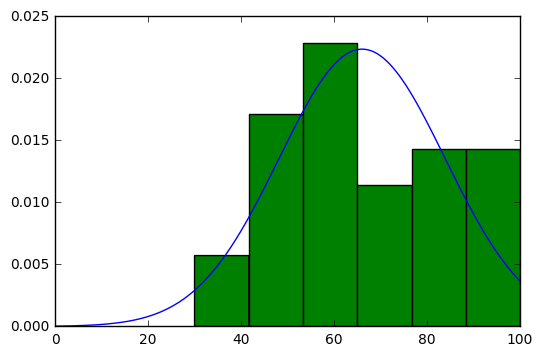

In [12]:
from math import sqrt, pi, e

Z = np.linspace(0,100,300)
guassian_func = lambda mu, sigma: lambda x: 1/(sqrt(2*pi)*sigma) * e**(-0.5*(x - mu)*(x-mu)/(sigma * sigma))
plt.plot(Z, guassian_func(mu, sigma)(Z))
_, _, _ = plt.hist(X,6, normed=True)


**Conclusion:** For any data-set, the mean and standard deviation of the best-fitting Gaussian distribution are the mean and standard deviation of the data-set.

## Random Simulation: modeling a real-life situation

The bus from my street to work is scheduled at 8:00 A.M. However, I measured that the bus' arrival time has a Gaussian (normal) distribution with mean 8:05 and a standard deviation of 4 minutes. 

If I miss the bus, the bus after that will come 50 minutes after the first bus.

When should I get to the bus stop to minimize my total expected waiting time? (I don't care how late I am. I just don't want to wait for the bus at the stop. I'm weird like that.)

Let's simulate

In [1]:
import random
time_till_next_bus = 50
mu = 0  # 8:05 is time 0
sigma = 4
N = 10000  # number of simulations

average_waiting_times = []

for my_arrival_at_stop in range(-20,20):
    sum_of_waiting_times = 0.0
    for i in range(N):
        bus_arrival = random.gauss(mu, sigma)
        if my_arrival_at_stop < bus_arrival:
            sum_of_waiting_times += bus_arrival - my_arrival_at_stop
        elif bus_arrival + time_till_next_bus > my_arrival_at_stop:
            sum_of_waiting_times += bus_arrival + time_till_next_bus - my_arrival_at_stop
        # if i missed the next bus too, don't count that one.
    average_waiting_times.append(sum_of_waiting_times / N)
    
plt.plot(range(-20,20), average_waiting_times)
plt.xlabel('my arrival time (8:05 is time 0)')
plt.ylabel('simulated average waiting time')

NameError: name 'plt' is not defined